# Exploração dos Dados

In [1]:
import pandas as pd
import altair as alt
import numpy as np

In [2]:
alt.data_transformers.enable('json')
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [3]:
bank_train = pd.read_csv("../data/interim/bank_train.csv")

In [4]:
bank_train.drop("y", axis=1).head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,50,blue-collar,married,basic.4y,unknown,unknown,unknown,telephone,may,tue,153,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,26,blue-collar,single,high.school,no,no,no,telephone,may,fri,213,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
2,34,technician,married,high.school,no,yes,no,cellular,aug,thu,85,3,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1
3,30,blue-collar,single,basic.9y,no,yes,no,telephone,may,fri,322,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
4,29,admin.,single,university.degree,no,yes,no,cellular,nov,thu,341,2,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8


In [5]:
bank_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30891 entries, 0 to 30890
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30891 non-null  int64  
 1   job             30891 non-null  object 
 2   marital         30891 non-null  object 
 3   education       30891 non-null  object 
 4   default         30891 non-null  object 
 5   housing         30891 non-null  object 
 6   loan            30891 non-null  object 
 7   contact         30891 non-null  object 
 8   month           30891 non-null  object 
 9   day_of_week     30891 non-null  object 
 10  duration        30891 non-null  int64  
 11  campaign        30891 non-null  int64  
 12  pdays           30891 non-null  int64  
 13  previous        30891 non-null  int64  
 14  poutcome        30891 non-null  object 
 15  emp.var.rate    30891 non-null  float64
 16  cons.price.idx  30891 non-null  float64
 17  cons.conf.idx   30891 non-null 

## Variáveis Numéricas

In [6]:
bank_train.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,30891.000000,30891.000000,30891.000000,30891.000000,30891.000000,30891.000000,30891.000000,30891.000000,30891.000000,30891.000000
mean,40.017287,257.551746,2.568839,963.029361,0.172348,0.083264,93.577223,-40.506782,3.622596,5167.037687
std,10.448075,259.371218,2.747802,185.544213,0.492298,1.570746,0.579333,4.629842,1.734393,72.461175
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,179.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,318.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
bank_train["y"].value_counts(normalize=True)

no     0.887119
yes    0.112881
Name: y, dtype: float64

In [8]:
bank_train.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.932966,220.495986,2.637352,984.727157,0.132134,0.252160,93.605344,-40.595333,3.814645,5176.265304
yes,40.679954,548.769429,2.030399,792.508460,0.488385,-1.244078,93.356221,-39.810869,2.113300,5094.518727


In [9]:
def plot_qvars(x, data=bank_train, step=4):
    hist = alt.Chart(data).mark_bar().encode(
        x=alt.X(x, bin=alt.Bin(step=step)),
        y="count()"
    )
    
    error_bar = alt.Chart(data).mark_errorbar(extent="stdev").encode(
        x=alt.X(x),
        y=alt.Y("y:N")
    )
    
    points = alt.Chart(data).mark_point(filled=True).encode(
        x=alt.X(x, aggregate="mean"),
        y=alt.Y("y:N")
    )
    
    return alt.vconcat(hist, alt.layer(error_bar, points)).resolve_scale(x="shared")

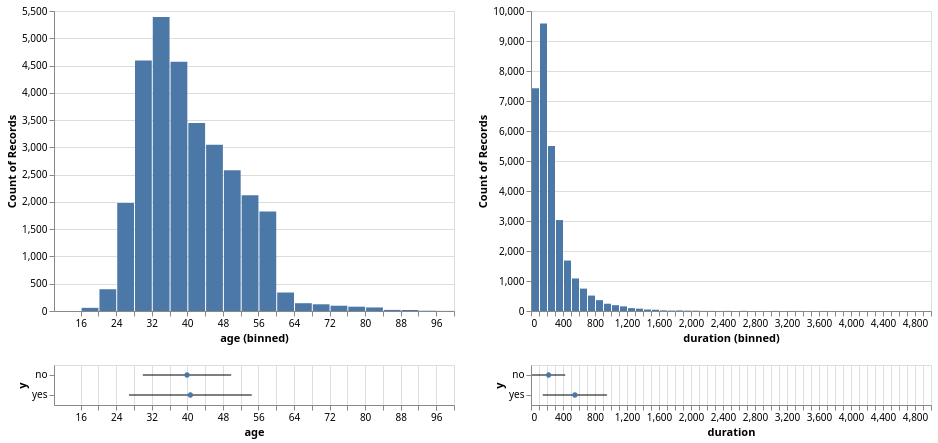

In [10]:
plot_qvars("age:Q", step=4) | plot_qvars("duration:Q", step=100)

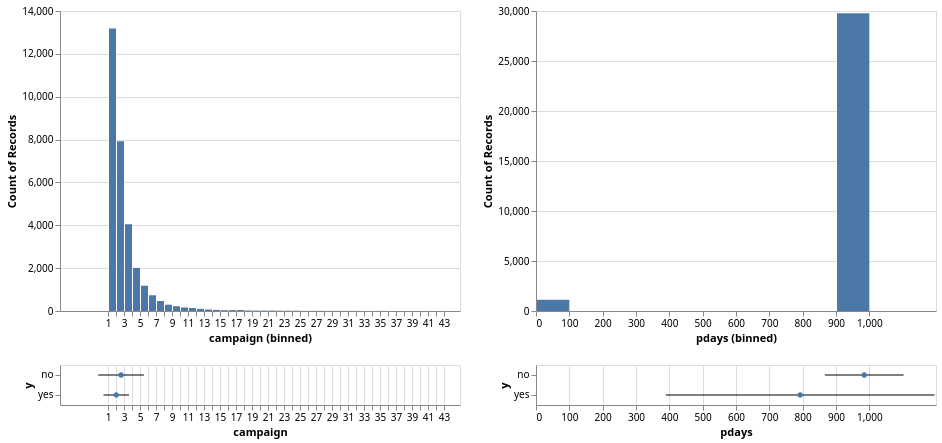

In [11]:
plot_qvars("campaign:Q", step=1) | plot_qvars("pdays:Q", step=100) 

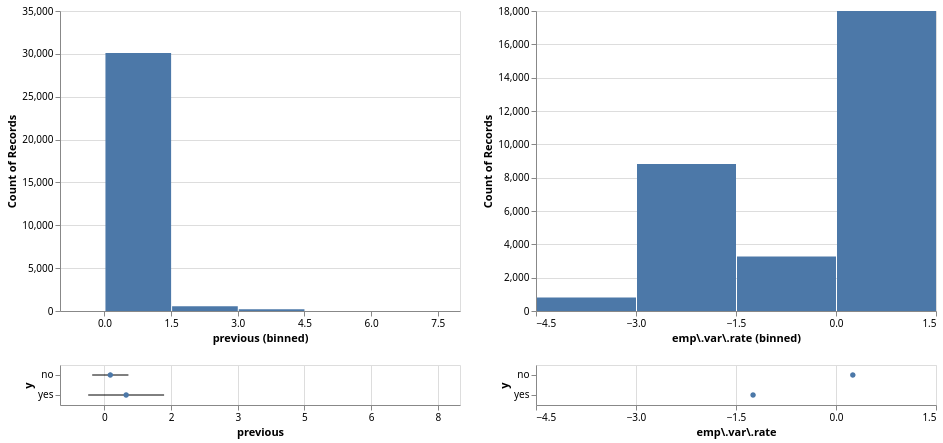

In [12]:
plot_qvars("previous:Q", step=1.5) | plot_qvars("emp\\.var\\.rate:Q", step=1.5)

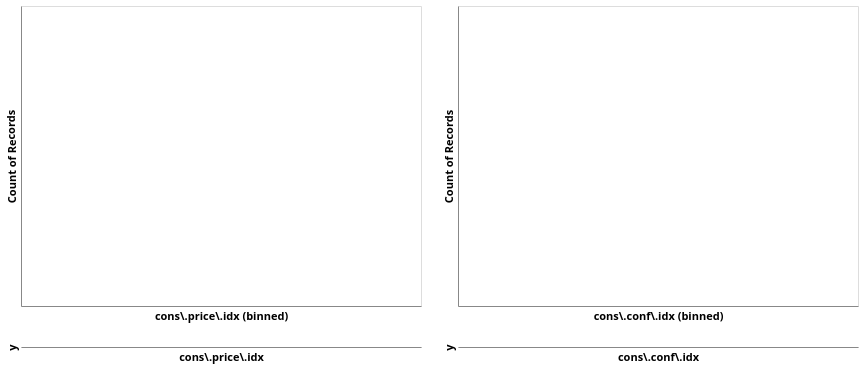

In [13]:
plot_qvars("cons\\.price\\.idx:Q", step=0.5) | plot_qvars("cons\\.conf\\.idx:Q", step=4)

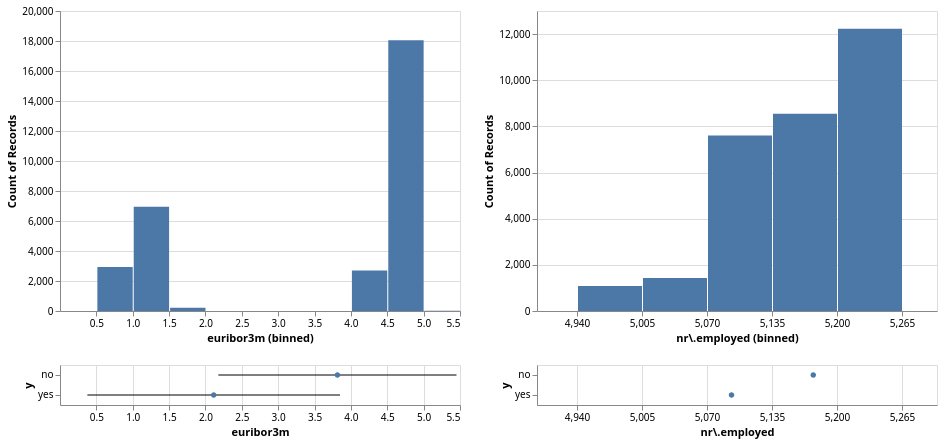

In [14]:
plot_qvars("euribor3m:Q", step=0.5) | plot_qvars("nr\\.employed:Q", step=65)

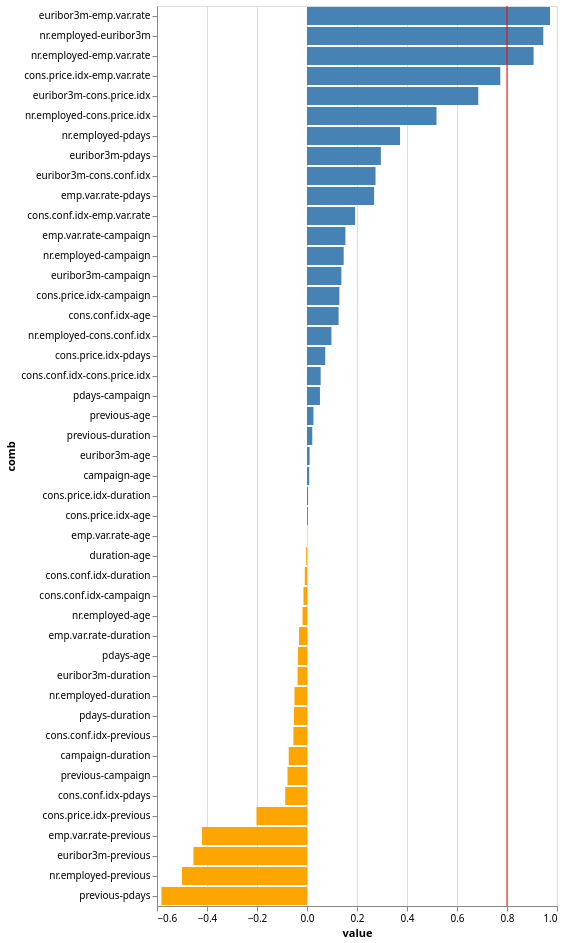

In [15]:
bank_tr_corr = bank_train.corr()
mask = np.triu(np.ones_like(bank_tr_corr, dtype=bool))
tri_bank_corr = bank_tr_corr.mask(mask)

bank_corr = tri_bank_corr.reset_index().melt(id_vars="index", value_vars=tri_bank_corr.columns).dropna(subset="value").sort_values("value", ascending=False)
bank_corr["comb"] = bank_corr["index"].str.cat(bank_corr["variable"], sep="-")

corr_bar_plot = alt.Chart(bank_corr).mark_bar().encode(
    x="value:Q",
    y=alt.Y("comb:N", sort="-x"),
    color=alt.condition(
        alt.datum.value > 0,
        alt.value("steelblue"),
        alt.value("orange")
    )
)

vline_corr = alt.Chart().mark_rule(color="red").encode(
    x=alt.datum(0.8)
)

corr_bar_plot + vline_corr

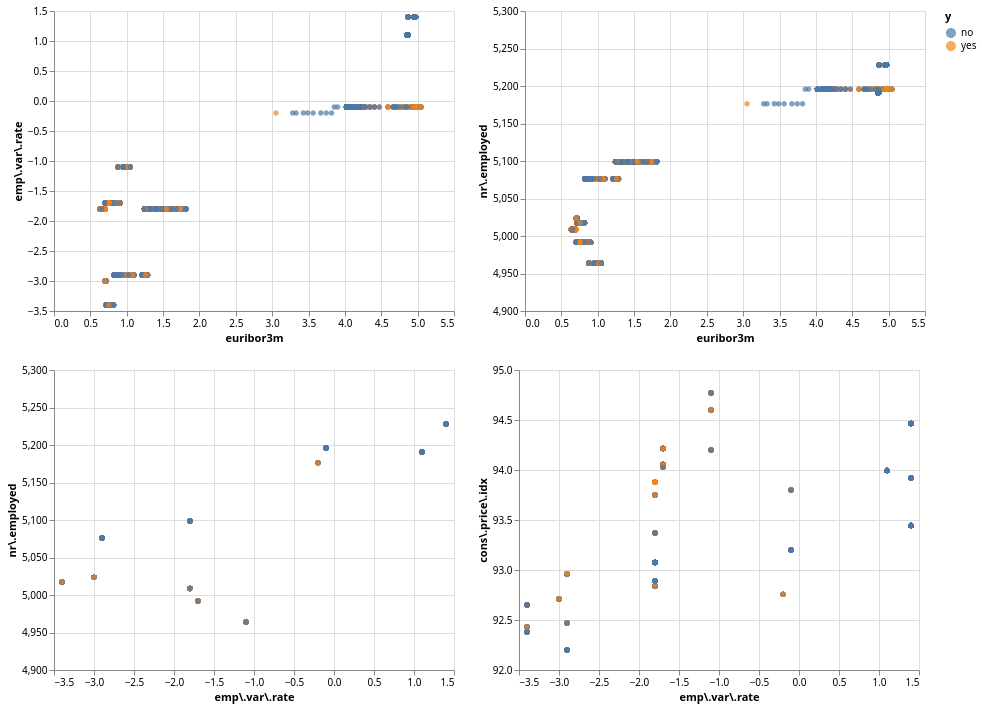

In [16]:
euribor_empvarrate = alt.Chart(bank_train).mark_circle().encode(
    x="euribor3m:Q",
    y="emp\\.var\\.rate:Q",
    color="y:N"
)

euribor_nremployed = alt.Chart(bank_train).mark_circle().encode(
    x="euribor3m:Q",
    y=alt.Y("nr\\.employed:Q", scale=alt.Scale(domain=(4900, 5300))),
    color="y:N"
)

nremployed_empvarrate = alt.Chart(bank_train).mark_circle().encode(
    x="emp\\.var\\.rate:Q",
    y=alt.Y("nr\\.employed:Q", scale=alt.Scale(domain=(4900, 5300))),
    color="y:N"
)

conspriceindex_empvarrate = alt.Chart(bank_train).mark_circle().encode(
    x="emp\\.var\\.rate:Q",
    y=alt.Y("cons\\.price\\.idx:Q", scale=alt.Scale(domain=(92, 95))),
    color="y:N"
)

(euribor_empvarrate | euribor_nremployed) & (nremployed_empvarrate | conspriceindex_empvarrate)

### Sobre `age` e `campaign`

A variável `age` tem poucos valores antes dos 24 anos e após os 60. Uma opção é discretizar e ordinalizar essa variável. Tentaremos dividir dessa forma

- Até 29;
- de 30 a 59
- 60 ou mais

A ideia então é discretizar em faixas que podem ser interpretadas como "jovens adultos", "adultos" e "idosos".

Outra variável numérica pra ser discretizada será `campaign`. Vamos deixar três categorias:

- Contato 1 vez;
- Contato 2 vezes;
- Contato 3 ou mais vezes.

### Sobre `duration`

A variável `duration` mede a duração da ligação. É uma variável extremamente correlacionada com a variável de resposta. Como nota a própria página do banco, se a duração é igual a 0, então y = "no". E há uma tendência de que quanto maior o tempo de ligação, maior a chance de y = "yes".

Ao mesmo tempo, ela não é uma boa variável se o objetivo é ter um modelo de previsão realista se um cliente irá fazer o depósito, pois não é possível saber a duração da ligação *ex-ante*, e sim *ex-post*, ou seja, só depois da ligação ser concluída. Por essa razão ela não será incluida no modelo de treinamento.

### Sobre `pdays` e `previous`

Ambas as variáveis são bastante correlacionadas. `pdays` é o número de dias desde o último contato ao cliente em uma campanha anterior (sendo 999 o valor caso o cliente nunca tenha sido contactado), e `previous` é o número de contatos em campanhas anteriores.

In [17]:
np.mean(bank_train["pdays"] == 999)

0.9637758570457414

`pdays` é uma variável com pouquissima variação, como se percebe. Um pouco mais de 96% das observações nunca foram contactadas, ou seja, tem valor 999. Sendo o objetivo a previsão, ela parece ser uma variável ruim pois tende a performar mal em um conjunto de dados nunca visto.

`previous` também sofre com pouca variação. Um pouco mais de 86% das observações não foram contactadas em campanhas anteriores. Por ser uma situação "menos grave" comparada a `pdays` vamos mante-la na hora de treinar o modelo.

In [18]:
np.mean(bank_train["previous"] == 0)

0.8636172347933055

In [19]:
bank_train["previous"].value_counts(normalize=True)

0    0.863617
1    0.110679
2    0.018193
3    0.005438
4    0.001554
5    0.000388
6    0.000097
7    0.000032
Name: previous, dtype: float64

Se percebe também que há muita pouca representação nessa variável para além do valor 0 e 1. Uma melhor opção vai ser agregar os outros valores iguais ou maiores que 2. A variável ficaria então assim: 0 (nunca foi contactado), 1 (contactado uma vez) e 2 (contactado 2 ou mais vezes)

Uma observação final é que algo parece estranho nas duas variáveis. Segundo a descrição das variáveis, disponível no [site](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing) do banco, quando `pdays` for igual a 999 significa que o cliente nunca foi contactado em campanhas anteriores, e como `previous` é uma variável que diz quantas vezes o cliente foi contactado em campanhas anteriores, espera-se que se `pdays` = 999, então `previous` = 0. Mas isso não acontece.

In [20]:
np.mean((bank_train["pdays"] == 999) == (bank_train["previous"] == 0))

0.899841377747564

Existe uma correlação forte, obviamente. Em cerca de 90% das vezes que `pdays` é 999, `previous` é 0. Mas o que acontece nos outros 10%, quando `pdays` é 999 e `previous` é diferente de 0?

A partir daqui vamos só supor que há justifativa para essa diferença e que provavelmente apenas interpretei errado a descrição das variáveis.

### Sobre `emp.var.rate`, `nr.employed` e `euribor3m`

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [22]:
sdsc = StandardScaler()
X = sdsc.fit_transform(bank_train[["emp.var.rate", "nr.employed", "euribor3m"]])

In [23]:
X

array([[ 0.64730549,  0.3306971 ,  0.7117327 ],
       [ 0.64730549,  0.3306971 ,  0.71057954],
       [ 0.8383006 ,  0.84270371,  0.77342676],
       ...,
       [-2.21762106, -2.06372733, -1.65397499],
       [ 0.64730549,  0.3306971 ,  0.71115612],
       [ 0.8383006 ,  0.84270371,  0.77112044]])

In [24]:
pca = PCA(n_components=1)

In [25]:
pca.fit_transform(X)

array([[-0.97798607],
       [-0.9773122 ],
       [-1.41651786],
       ...,
       [ 3.42361359],
       [-0.97764913],
       [-1.41517013]])

In [26]:
pca.explained_variance_ratio_

array([0.9608773])

emp.var.rate, nr.employed, e euribor3m são muito correlacionadas entre si. Um PCA pode reduzir para um componente com ~96% de variância explicada.

## Variáveis Categóricas

In [27]:
def plot_bar(y):
    chart = alt.Chart(bank_train).mark_bar().encode(
        y=y,
        x="count()",
        color="y:N"
    )
    return chart

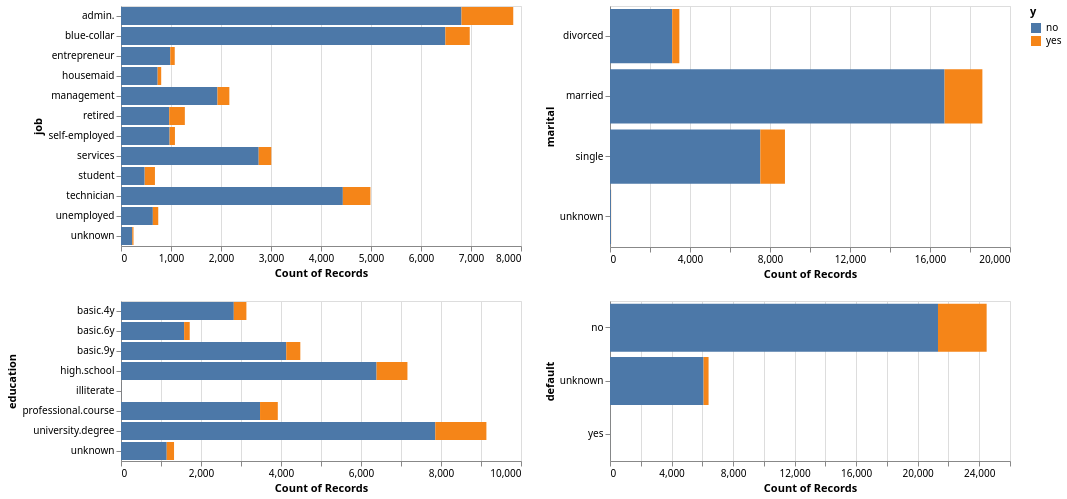

In [28]:
(plot_bar("job:N") | plot_bar("marital:N").properties(height=241)) & (plot_bar("education:N") | plot_bar("default:N").properties(height=160))

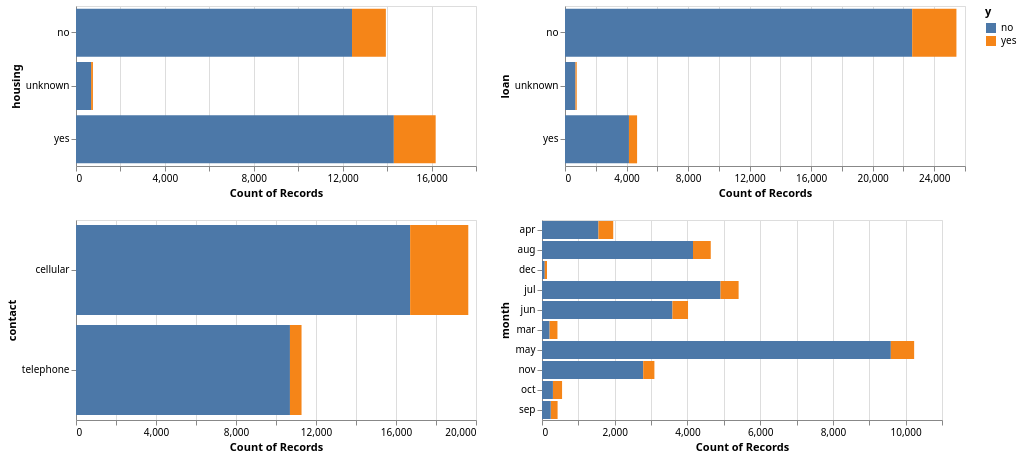

In [29]:
(plot_bar("housing:N").properties(height=160) | plot_bar("loan:N").properties(height=160)) & (plot_bar("contact:N").properties(height=200) | plot_bar("month:N"))

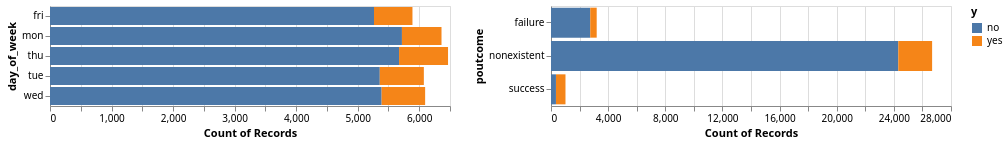

In [30]:
plot_bar("day_of_week:N") | plot_bar("poutcome:N").properties(height=100)

### Sobre `job`

São doze categorias em `job`. Codificar essa variável com o OneHotEncoder introduziria muitas dimensões e ao mesmo tempo não há uma ordinalidade natural nessa variável. Uma opção melhor é usar o `TargetEncoder` do pacote `categorial_encoders`.

### Sobre `marital` e `default`,

Baixa representação de unknown em `marital` e yes em `default`. Dropar ambas as categorias na hora de fazer o OneHot.

### Sobre `education`, `month` e `day_of_week`.

Em `education` agregar categorias "basic" em uma categoria só, e usar um `OrdinalEncoder`, dado uma ordinalidade natural nessa variável: basic -> high school -> professional -> university.

`month` e `day_of_week` também tem uma ordinalidade natural, então é só aplicar o `OrdinalEncoder`.

### Sobre `poutcome`

Existe um pouco de redundancia com `poutcome` e `previous`. Se `poutcome` = "nonexistent" então `previous` = 0. E assim como `previous`, a variável é bem concentrada em uma só categoria, nonexistent. Mas manteremos.

In [31]:
bank_train["previous"].value_counts(normalize=True)

0    0.863617
1    0.110679
2    0.018193
3    0.005438
4    0.001554
5    0.000388
6    0.000097
7    0.000032
Name: previous, dtype: float64

In [32]:
bank_train["poutcome"].value_counts(normalize=True)

nonexistent    0.863617
failure        0.103558
success        0.032825
Name: poutcome, dtype: float64